In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [23]:
data_ad=pd.read_csv('Ads_CTR_Optimisation.csv')

In [24]:
data_ad.head()

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0


In [25]:
#when a user click --> 1 else -->0
#Every user we will display 10 ad
#we will do it to 10000 user
#interactive learning is also called reinforcement learning.
# 

In [26]:
import random

N=10000
d=10
ads_selected=[]
total_reward=0

for n in range(0,N):
    ad=random.randrange(d)
    ads_selected.append(ad)
    reward=data_ad.values[n,ad]
    total_reward=total_reward+reward

In [27]:
#We are creating Random selection without algorithm or another strategy,

In [28]:
ads_selected[0:5]

[3, 2, 4, 2, 1]

In [29]:
total_reward

1231

In [30]:
#Out of 10000 people only 1174 people has clicked the ad.

Text(0,0.5,'Count')

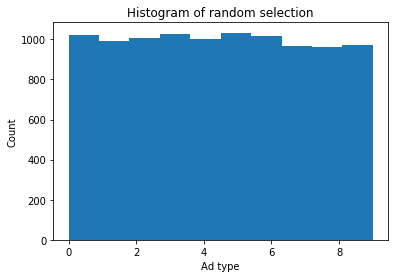

In [31]:
plt.hist(ads_selected)
plt.title('Histogram of random selection')
plt.xlabel('Ad type')
plt.ylabel('Count')



In [32]:
#Hence we use upper bound confidence algorithm
#Implementing UCB
#Step 1:

In [33]:
number_of_selections=[0]*d
sums_of_reward=[0]*d
ad_select=[]

In [34]:
number_of_selections

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [36]:
#Step 2:
for n in range(0,N):
    #calcuate average and confidence
    for i in range(0,d):
        average_reward=sums_of_reward[i]/number_of_selections[i]
        delta_i=math.sqrt(3/2*math.log(n+1)/number_of_selections[i])
        upper_bound=average_reward+delta_i
        


ZeroDivisionError: division by zero